# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
startups_data = pd.read_csv('50_Startups.csv')

In [3]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startups_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
duplicate = startups_data[startups_data.duplicated()]
print('Duplicate Rows are :')
duplicate

Duplicate Rows are :


,R&D Spend,Administration,Marketing Spend,State,Profit


In [7]:
startups_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


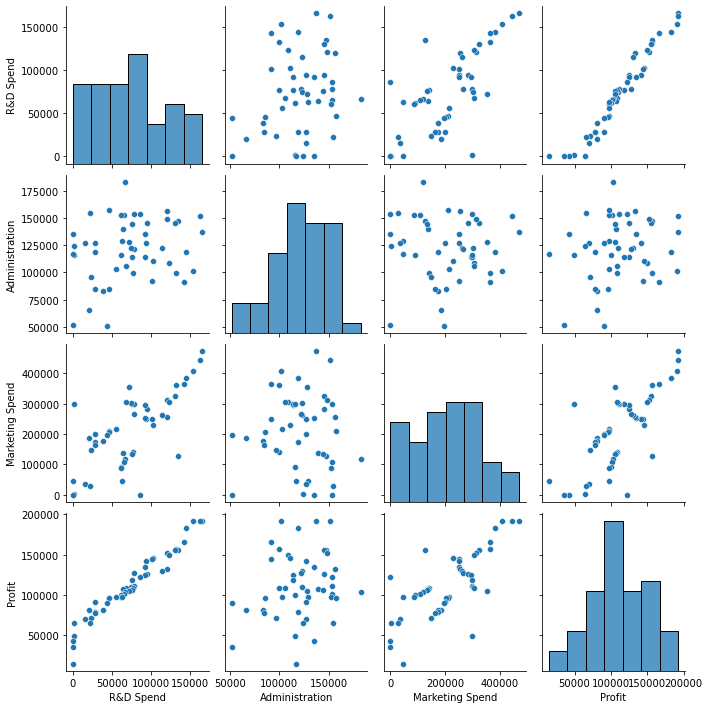

In [8]:
sns.pairplot(startups_data)

<AxesSubplot:>

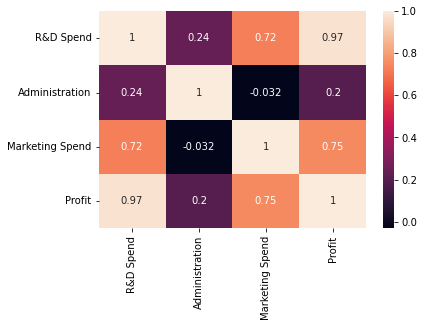

In [9]:
sns.heatmap(startups_data.corr(),annot=True)

In [10]:
startups_data = startups_data.rename(columns={'R&D Spend': 'rd_spend', 'Administration': 'administration',
                                            'Marketing Spend':'marketing_spend','State':'state','Profit':'profit' })
startups_data

,rd_spend,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Preparing Model

In [11]:
model = smf.ols('profit~rd_spend+administration+marketing_spend',data=startups_data).fit()

In [12]:
model.params

Intercept          50122.192990
rd_spend               0.805715
administration        -0.026816
marketing_spend        0.027228
dtype: float64

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
rd_spend           17.846374
administration     -0.525507
marketing_spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
rd_spend           2.634968e-22
administration     6.017551e-01
marketing_spend    1.047168e-01
dtype: float64


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        11:31:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend            0.8057      0.045     17.846      0.000       0.715       0.897
administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models.

In [15]:
ml_rd = smf.ols('profit~rd_spend',data=startups_data).fit()
#t and p-Values
print(ml_rd.tvalues, '\n', ml_rd.pvalues) 

Intercept    19.320288
rd_spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
rd_spend     3.500322e-32
dtype: float64


In [16]:
ml_admin = smf.ols('profit~administration',data=startups_data).fit()
#t and p-Values
print(ml_admin.tvalues, '\n', ml_admin.pvalues) 

Intercept         3.040044
administration    1.419493
dtype: float64 
 Intercept         0.003824
administration    0.162217
dtype: float64


In [17]:
ml_mspend = smf.ols('profit~marketing_spend',data=startups_data).fit()
#t and p-Values
print(ml_mspend.tvalues, '\n', ml_mspend.pvalues) 

Intercept          7.808356
marketing_spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
marketing_spend    4.381073e-10
dtype: float64


In [18]:
ml_admin_mspend = smf.ols('profit~marketing_spend+administration',data=startups_data).fit()
#t and p-Values
print(round(ml_admin_mspend.tvalues,3)
        ,'\n',round(ml_admin_mspend.pvalues,3))

Intercept          1.143
marketing_spend    8.281
administration     2.468
dtype: float64 
 Intercept          0.259
marketing_spend    0.000
administration     0.017
dtype: float64


# Calculating VIF

In [19]:
rsq_rd_spend = smf.ols('rd_spend~administration+marketing_spend',
                       data=startups_data).fit().rsquared
vif_rd_spend = 1/(1-rsq_rd_spend)

rsq_admin = smf.ols('administration~rd_spend+marketing_spend',
                       data=startups_data).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_marketing_spend = smf.ols('marketing_spend~rd_spend+administration',
                       data=startups_data).fit().rsquared
vif_marketing_spend = 1/(1-rsq_marketing_spend)

# Storing vif values in a data frame
d1 = {'Variables':['rd_spend','admin','marketing_spend'],'VIF':[vif_rd_spend,vif_admin,vif_marketing_spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,rd_spend,2.468903
1,admin,1.175091
2,marketing_spend,2.326773


# Residual Analysis
Test for Normality of Residuals (Q-Q Plot)

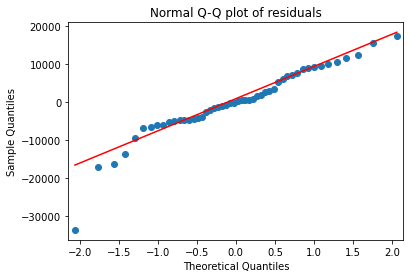

In [20]:
import statsmodels.api as sm

qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [21]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

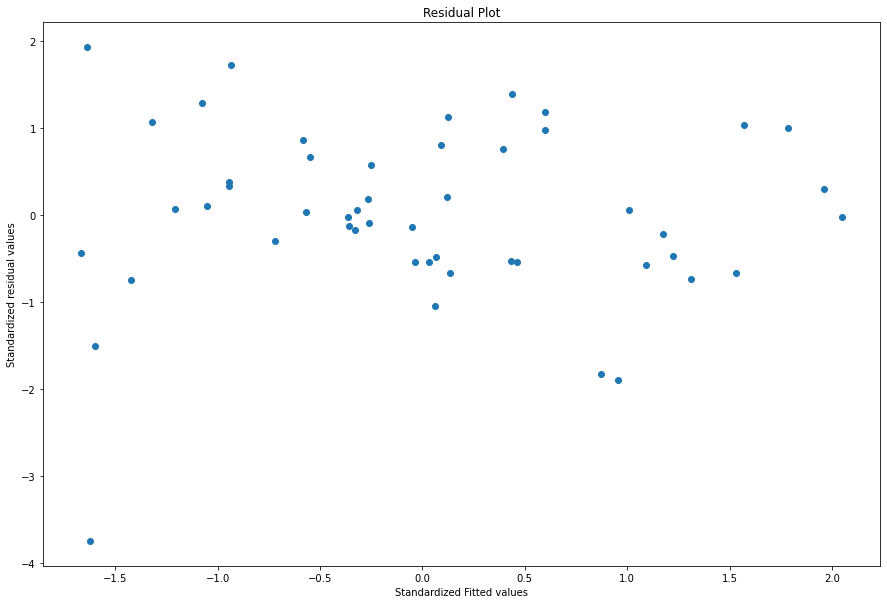

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


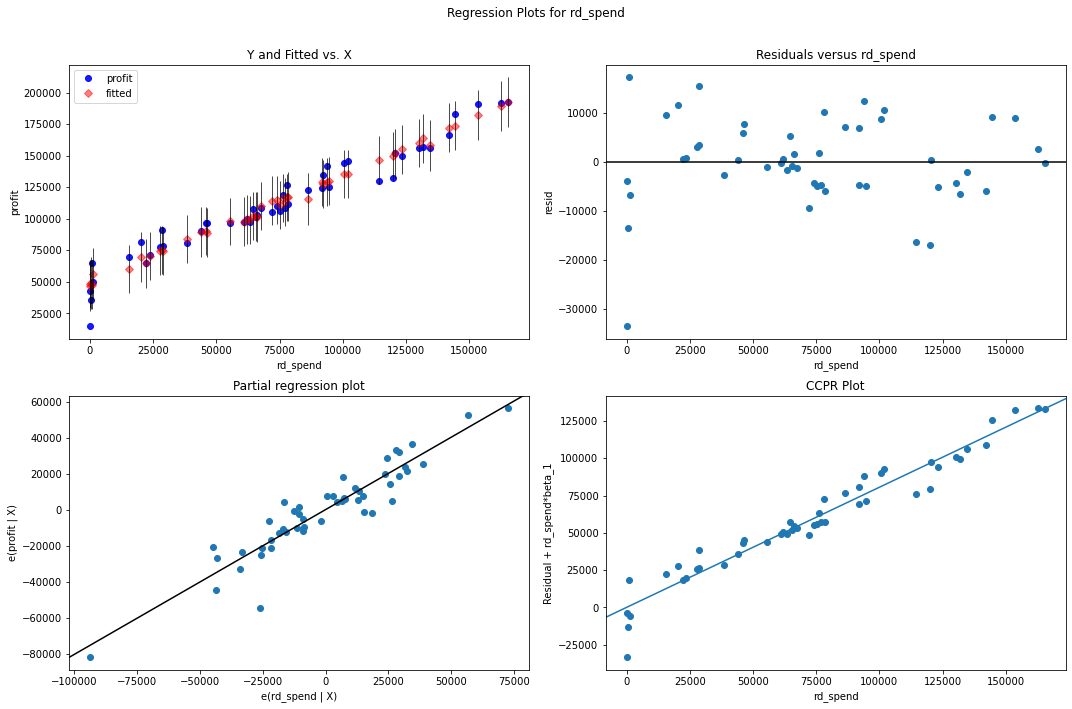

In [24]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'rd_spend', fig=fig)
plt.show()

eval_env: 1


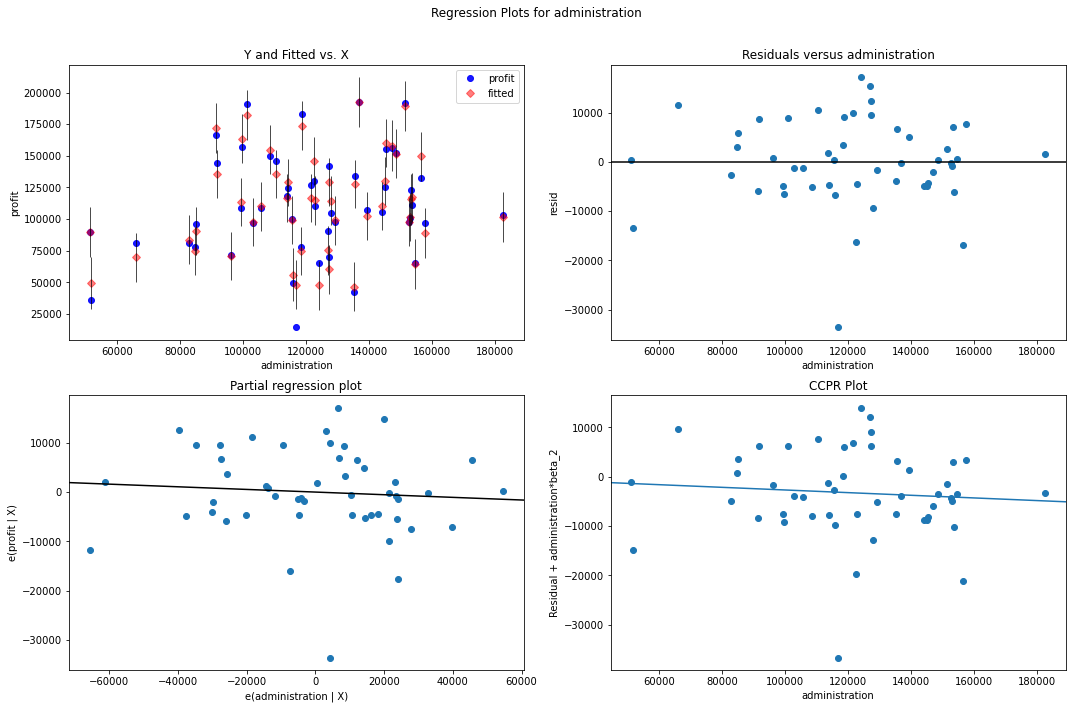

In [25]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'administration', fig=fig)
plt.show()

eval_env: 1


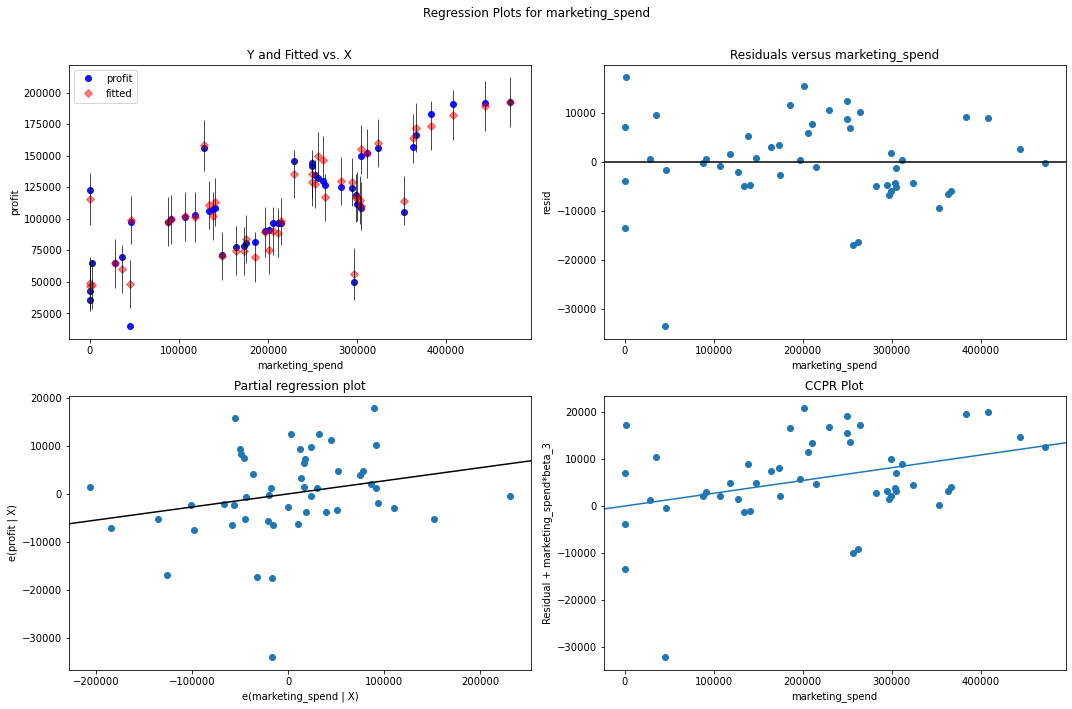

In [26]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'marketing_spend', fig=fig)
plt.show()

# Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

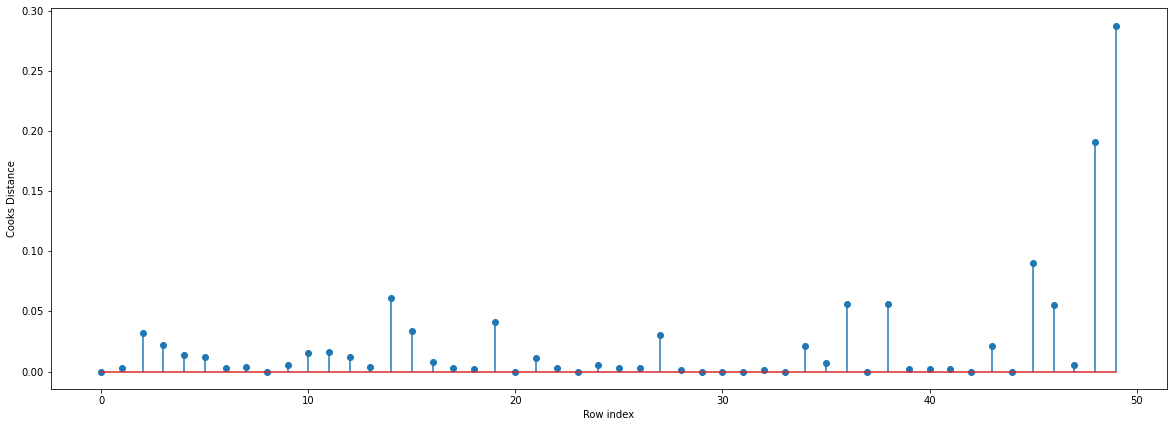

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence points

In [30]:
startups_data.shape

(50, 5)

In [31]:
k = startups_data.shape[1]
n = startups_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

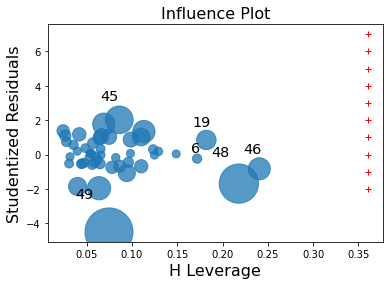

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alhpa=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [33]:
startups_data[startups_data.index.isin([19,45,48,49])]

,rd_spend,administration,marketing_spend,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
45,1000.23,124153.04,1903.93,New York,64926.08
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [34]:
startups_data.head(10)

,rd_spend,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
startups_data[startups_data['marketing_spend']==0]

,rd_spend,administration,marketing_spend,state,profit
19,86419.70,153514.11,0.0,New York,122776.86
47,0.00,135426.92,0.0,California,42559.73
48,542.05,51743.15,0.0,New York,35673.41


In [36]:
startups_data[startups_data['rd_spend']==0]

,rd_spend,administration,marketing_spend,state,profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


In [37]:
startups_data[startups_data['administration']<20000]

,rd_spend,administration,marketing_spend,state,profit


In [38]:
startups_data[startups_data['rd_spend']>70000]

,rd_spend,administration,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [39]:
startups_data[startups_data['administration']<60000]

,rd_spend,administration,marketing_spend,state,profit
37,44069.95,51283.14,197029.42,California,89949.14
48,542.05,51743.15,0.00,New York,35673.41


In [40]:
startups_data[startups_data['rd_spend']<=600]

,rd_spend,administration,marketing_spend,state,profit
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


From above observations we can conclude that data points at indexes 28,37,48,49 are high influece points

# Improving the model

In [41]:
startups_data_backup = startups_data.copy()
startups_data_backup.shape

(50, 5)

In [42]:
#Removing high influence data point at indexes 28,37,48,49 
startup_improv_1 = startups_data.drop(startups_data.index[[48,49]],axis=0).reset_index(drop=True)

In [43]:
startup_improv_1.shape

(48, 5)

# Final Model 

In [44]:
startup_improv_1.columns

Index(['rd_spend', 'administration', 'marketing_spend', 'state', 'profit'], dtype='object')

In [45]:
final_startup_model = smf.ols('profit~rd_spend+administration+marketing_spend',data=startup_improv_1).fit()

In [46]:
(final_startup_model.rsquared,final_startup_model.aic)

(0.9626766170294073, 994.6690439260116)

In [47]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = final_startup_model.get_influence()
(c, _) = model_influence.cooks_distance

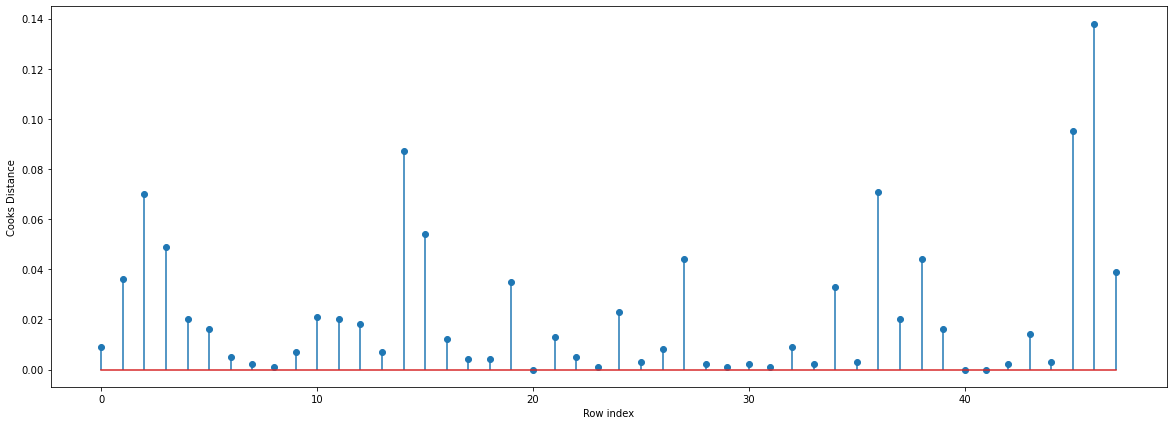

In [48]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_improv_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(46, 0.13829133994334772)

In [50]:
startup_improv_1[c>1]

,rd_spend,administration,marketing_spend,state,profit


Since now values are <1 we stop diagnosis here and finalize the model

In [51]:
final_startup_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           2.03e-31
Time:                        11:31:37   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rd_spend            0.7895      0.036     21.718      0.000       0.716       0.863
administration     -0.0633      0.044     -1.442      0.156      -0.152       0.025
marketing_spend     0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting New Data

In [52]:
data_to_pred = pd.DataFrame({'rd_spend':100000,'administration':100000,'marketing_spend':250000},index=[1])
data_to_pred

,rd_spend,administration,marketing_spend
1,100000,100000,250000


In [53]:
final_startup_model.predict(data_to_pred)

1    135936.827497
dtype: float64